In [11]:
import pandas as pd
confirmed_df=pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths_df=pd.read_csv("time_series_covid19_deaths_global.csv")
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [12]:
confirmed=confirmed_df.drop(['Lat', 'Long', 'Province/State'], axis=1)
confirmed=confirmed.groupby('Country/Region').sum()
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [14]:
pd.set_option('display.max_rows', None)
confirmed.head(200)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
Antarctica,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
Argentina,0,0,0,0,0,0,0,0,0,0,...,10044125,10044125,10044125,10044125,10044125,10044125,10044957,10044957,10044957,10044957
Armenia,0,0,0,0,0,0,0,0,0,0,...,446819,446819,446819,446819,446819,446819,446819,446819,447308,447308


In [16]:
confirmed_transposed=confirmed.T

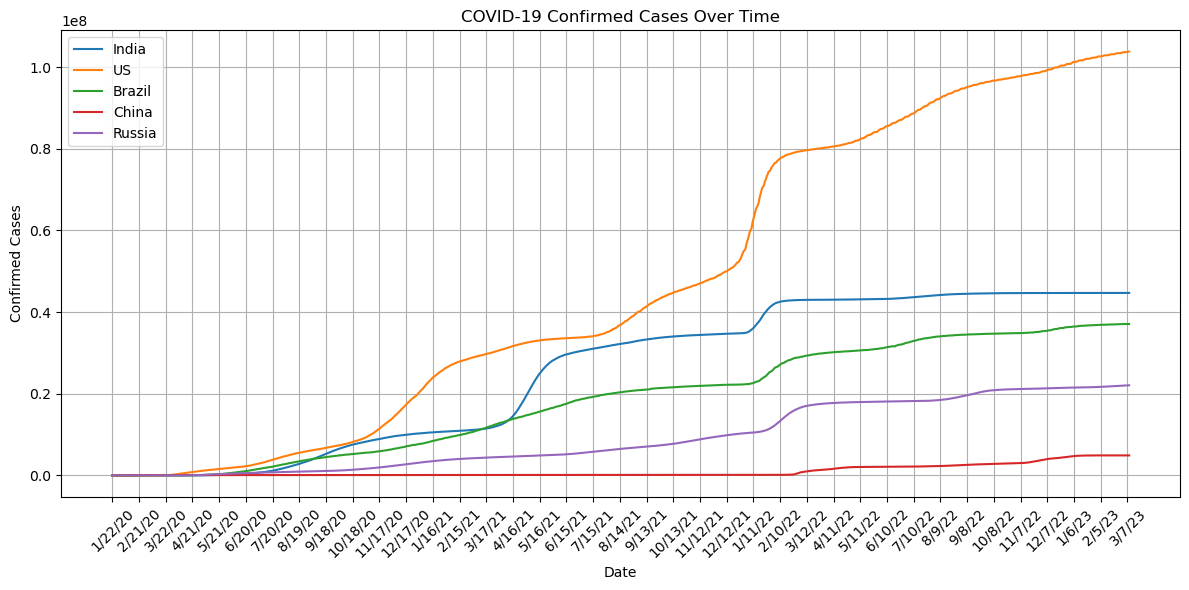

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in ['India', 'US', 'Brazil', 'China', 'Russia']:
    plt.plot(confirmed_transposed.index, confirmed_transposed[country], label=country)

plt.title("COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.xticks(ticks=confirmed_transposed.index[::30], labels=confirmed_transposed.index[::30], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()